<a href="https://colab.research.google.com/github/MateoLopez00/AMO-Project/blob/main/AMO_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AMO Project Orchestration

*   **Input**: *A piano MIDI file.*
*   **Processing**: *Extracts features, segments layers, assigns instruments, and limits ranges.*
*   **Output**: *A fully orchestrated MIDI file with metrics for quality evaluation.*
*   **Visualization**: *Plots to illustrate the orchestration structure and complexity.*

## Orchestration #1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 82.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 4.3 MB/s eta 0:00:00
  Created wheel for pretty_midi: filename=pretty_midi-0.2.10-py3-none-any.whl size=5592287 sha256=5ce71a9f6ba2bbe902d65cfc8bf23bceaf6e007fea01066a2958e52a275d5939
  Stored in directory: /root/.cache/pip/wheels/cd/a5/30/7b8b7f58709f5150f67f98fde4b891ebf0be9ef07a8af49f25
Successfully built pretty_midi
Cloning into 'AMO-Project'...
remote: Enumerating objects: 108, done.
remote: Counting objects: 100% (108/108), done.
remote: Compressing objects: 100% (79/79), done.
remote: Total 108 (delta 44), reused 80 (delta 22), pack-reused 0 (from 0)
Receiving objects: 100% (108/108), 127.40 KiB | 12.74 MiB/s, done.
Resolving deltas: 100% (44/44), done.


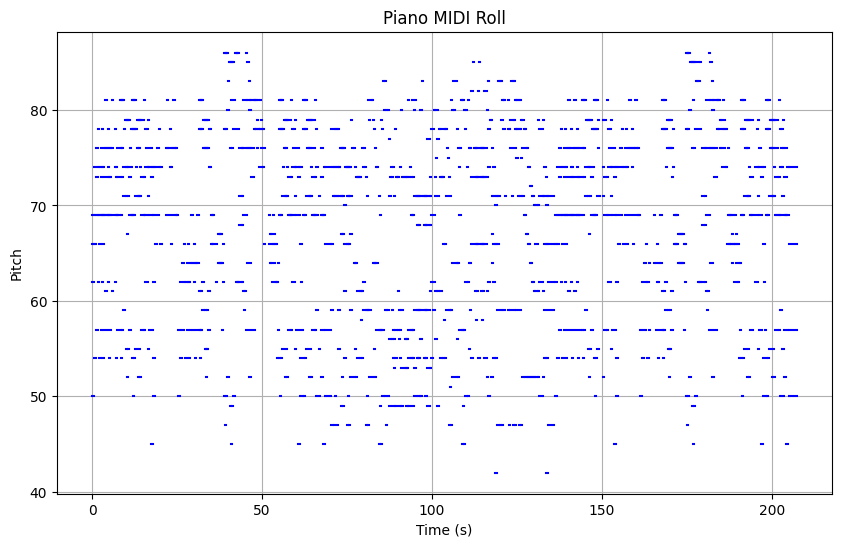

Evaluation Results: {'Pitch Coverage': 1.0, 'Timing Accuracy': 1.0, 'Range Appropriateness': 1.0}
Pitch Class Entropy: 2.96
Scale Consistency: 0.70
Average Polyphony: 2.07


In [1]:
# Install required libraries
!pip install pretty_midi numpy matplotlib

# Remove existing directory and re-clone the repository
!rm -rf /content/AMO-Project
!git clone https://github.com/MateoLopez00/AMO-Project.git

# Add the functions folder to sys.path
import sys
sys.path.append('/content/AMO-Project/functions')

# Import pretty_midi directly for main notebook usage
import pretty_midi

# Import functions from the modules
from midi_processing import extract_midi_features
from visualization import plot_piano_roll, plot_polyphony
from segmentation import segment_layers
from orchestration import create_and_assign_instruments
from evaluation import evaluate_orchestration
from evaluation import pitch_class_entropy
from evaluation import scale_consistency
from evaluation import average_polyphony

# Main workflow
piano_midi_path = "/content/AMO-Project/examples/handel-water-music-hornpipe-piano_solo.mid"
ground_truth_midi_path = "/content/AMO-Project/examples/handel-water-music-hornpipe_orch.mid"
predicted_orchestration_midi_path = "orchestration1.mid"

instrument_map = {
    "melody": ("Violin", 55, 103),
    "harmony": ("French Horn", 36, 65),
    "rhythm": ("Timpani", 29, 51)
}

# Load and process MIDI
piano_notes = extract_midi_features(piano_midi_path)
plot_piano_roll(piano_notes, "Piano MIDI Roll")

# Segment layers
melody, harmony, rhythm = segment_layers(piano_notes)

# Assign notes to instruments
layer_notes = {
    "melody": (melody, *instrument_map["melody"]),
    "harmony": (harmony, *instrument_map["harmony"]),
    "rhythm": (rhythm, *instrument_map["rhythm"]),
}
instruments, orchestration_notes = create_and_assign_instruments(layer_notes, instrument_map)

# Save orchestration MIDI
orchestral_midi = pretty_midi.PrettyMIDI()
orchestral_midi.instruments.extend(instruments.values())
orchestral_midi.write(predicted_orchestration_midi_path)

# Evaluate and display results
instrument_ranges = {name: (min_pitch, max_pitch) for name, min_pitch, max_pitch in instrument_map.values()}
evaluation_results = evaluate_orchestration(piano_notes, orchestration_notes, instrument_ranges)
print("Evaluation Results:", evaluation_results)

# Evaluate

# Pitch class entropy
entropy = pitch_class_entropy(predicted_orchestration_midi_path)
print(f"Pitch Class Entropy: {entropy:.2f}")

# Scale consistency
scale_consistency_score = scale_consistency(predicted_orchestration_midi_path)
print(f"Scale Consistency: {scale_consistency_score:.2f}")

# Texture analysis
avg_polyphony = average_polyphony(predicted_orchestration_midi_path)
print(f"Average Polyphony: {avg_polyphony:.2f}")

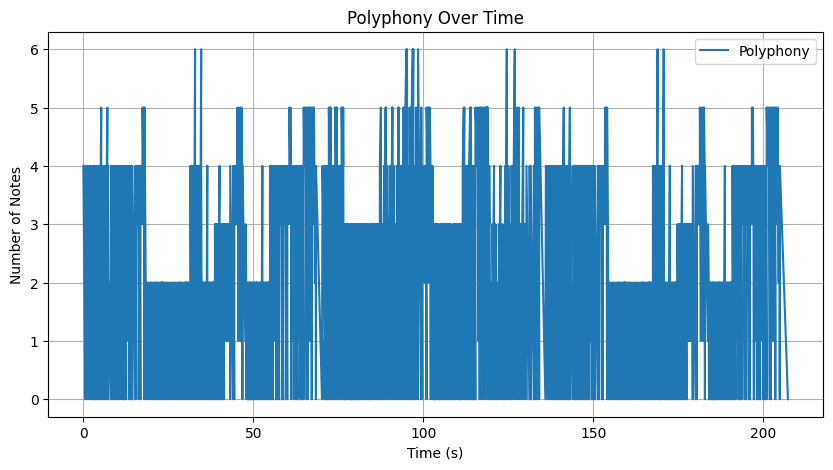

In [2]:
# Plot polyphony
plot_polyphony(orchestration_notes)

## Orchestration #2

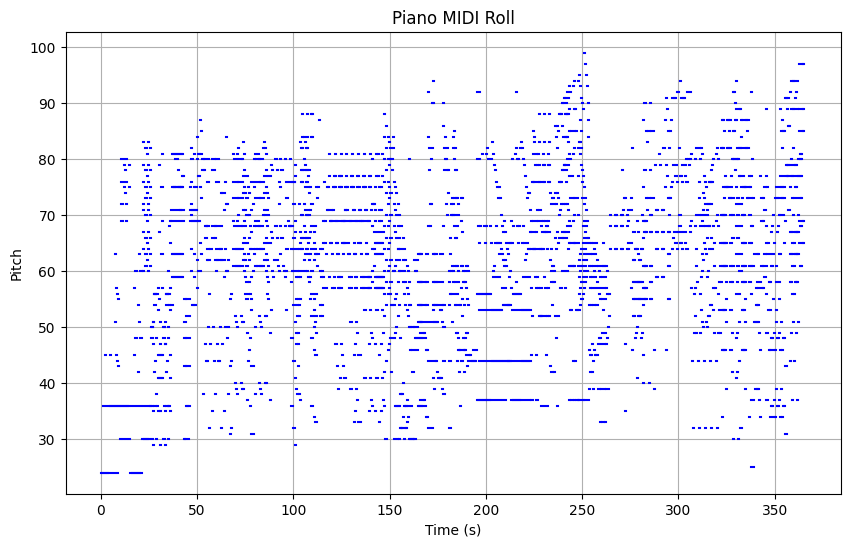

Evaluation Results: {'Pitch Coverage': 0.9726027397260274, 'Timing Accuracy': 0.9887088342916884, 'Range Appropriateness': 1.0}
Pitch Class Entropy: 3.52
Scale Consistency: 0.53
Average Polyphony: 4.08


In [3]:
piano_midi_path = "/content/AMO-Project/examples/la_mer_3_811_solo.mid"
ground_truth_midi_path = "/content/AMO-Project/examples/la_mer_3_orch.mid"
predicted_orchestration_midi_path = "orchestration2.mid"

instrument_map = {
    "melody": ("Violin", 55, 103),
    "harmony": ("French Horn", 36, 65),
    "rhythm": ("Timpani", 29, 51)
}

# Load and process MIDI
piano_notes = extract_midi_features(piano_midi_path)
plot_piano_roll(piano_notes, "Piano MIDI Roll")

# Segment layers
melody, harmony, rhythm = segment_layers(piano_notes)

# Assign notes to instruments
layer_notes = {
    "melody": (melody, *instrument_map["melody"]),
    "harmony": (harmony, *instrument_map["harmony"]),
    "rhythm": (rhythm, *instrument_map["rhythm"]),
}
instruments, orchestration_notes = create_and_assign_instruments(layer_notes, instrument_map)

# Save orchestration MIDI
orchestral_midi = pretty_midi.PrettyMIDI()
orchestral_midi.instruments.extend(instruments.values())
orchestral_midi.write(predicted_orchestration_midi_path)

# Evaluate and display results
instrument_ranges = {name: (min_pitch, max_pitch) for name, min_pitch, max_pitch in instrument_map.values()}
evaluation_results = evaluate_orchestration(piano_notes, orchestration_notes, instrument_ranges)
print("Evaluation Results:", evaluation_results)

# Evaluate

# Pitch class entropy
entropy = pitch_class_entropy(predicted_orchestration_midi_path)
print(f"Pitch Class Entropy: {entropy:.2f}")

# Scale consistency
scale_consistency_score = scale_consistency(predicted_orchestration_midi_path)
print(f"Scale Consistency: {scale_consistency_score:.2f}")

# Texture analysis
avg_polyphony = average_polyphony(predicted_orchestration_midi_path)
print(f"Average Polyphony: {avg_polyphony:.2f}")

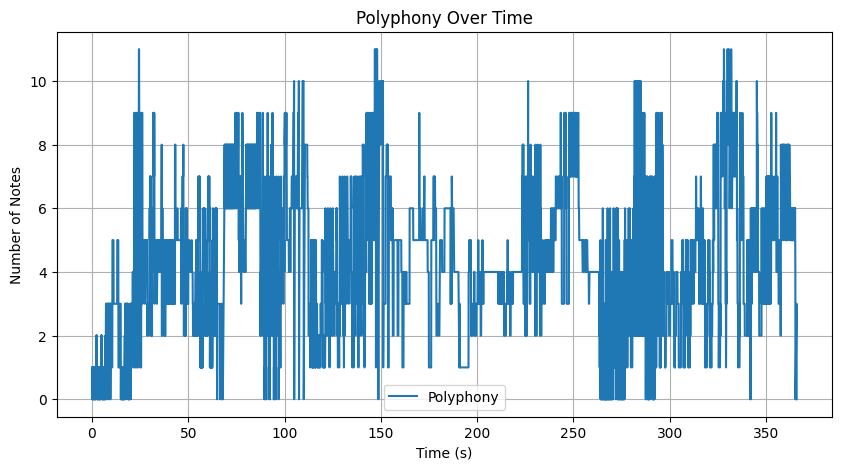

In [4]:
# Plot polyphony
plot_polyphony(orchestration_notes)

## Orchestration #3

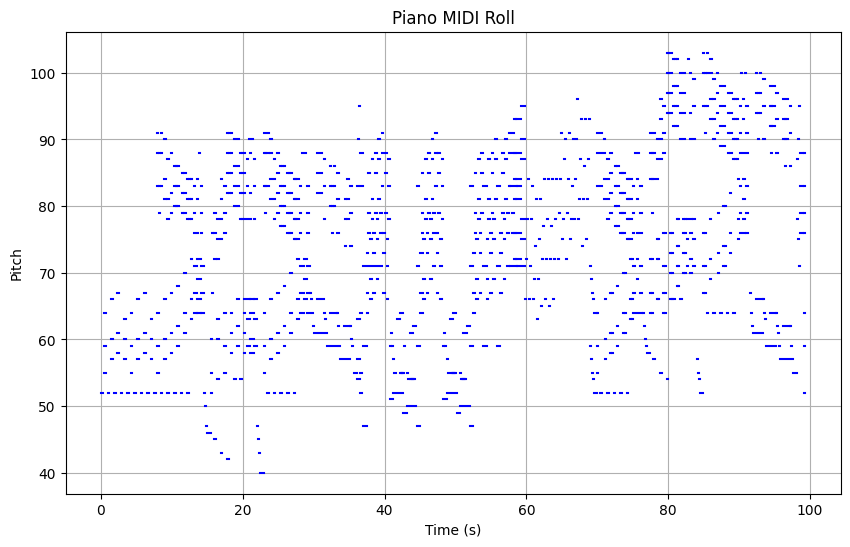

Evaluation Results: {'Pitch Coverage': 1.0, 'Timing Accuracy': 1.0, 'Range Appropriateness': 1.0}
Pitch Class Entropy: 3.34
Scale Consistency: 0.64
Average Polyphony: 2.29


In [5]:
piano_midi_path = "/content/AMO-Project/examples/sugar-plum-fairy-piano_solo.mid"
ground_truth_midi_path = "/content/AMO-Project/examples/sugar-plum-fairy_orch.mid"
predicted_orchestration_midi_path = "orchestration3.mid"

instrument_map = {
    "melody": ("Violin", 55, 103),
    "harmony": ("French Horn", 36, 65),
    "rhythm": ("Timpani", 29, 51)
}

# Load and process MIDI
piano_notes = extract_midi_features(piano_midi_path)
plot_piano_roll(piano_notes, "Piano MIDI Roll")

# Segment layers
melody, harmony, rhythm = segment_layers(piano_notes)

# Assign notes to instruments
layer_notes = {
    "melody": (melody, *instrument_map["melody"]),
    "harmony": (harmony, *instrument_map["harmony"]),
    "rhythm": (rhythm, *instrument_map["rhythm"]),
}
instruments, orchestration_notes = create_and_assign_instruments(layer_notes, instrument_map)

# Save orchestration MIDI
orchestral_midi = pretty_midi.PrettyMIDI()
orchestral_midi.instruments.extend(instruments.values())
orchestral_midi.write(predicted_orchestration_midi_path)

# Evaluate and display results
instrument_ranges = {name: (min_pitch, max_pitch) for name, min_pitch, max_pitch in instrument_map.values()}
evaluation_results = evaluate_orchestration(piano_notes, orchestration_notes, instrument_ranges)
print("Evaluation Results:", evaluation_results)

# Evaluate

# Pitch class entropy
entropy = pitch_class_entropy(predicted_orchestration_midi_path)
print(f"Pitch Class Entropy: {entropy:.2f}")

# Scale consistency
scale_consistency_score = scale_consistency(predicted_orchestration_midi_path)
print(f"Scale Consistency: {scale_consistency_score:.2f}")

# Texture analysis
avg_polyphony = average_polyphony(predicted_orchestration_midi_path)
print(f"Average Polyphony: {avg_polyphony:.2f}")

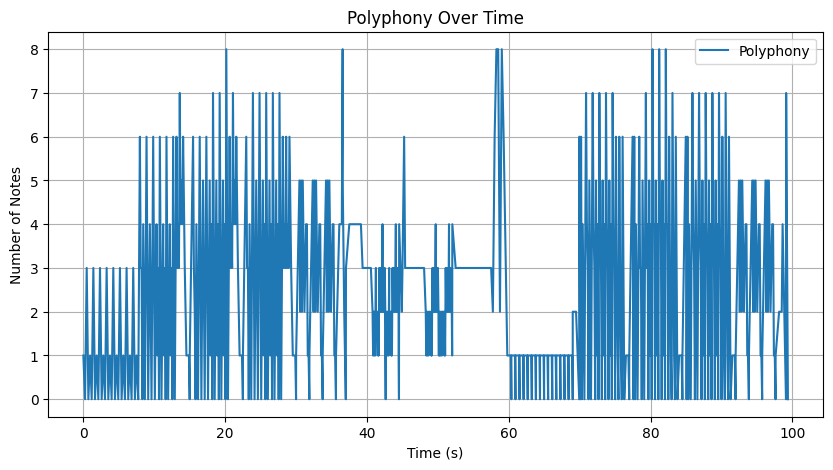

In [6]:
# Plot polyphony
plot_polyphony(orchestration_notes)